# 공공데이터 상권정보 분석해보기
* 국가중점데이터인 상권정보 보기

## 필요한 라이브러리 불러오기
* Pandas (엑셀과 유사)
* Numpy (수치 계산)
* Seaborn (시각화)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [22]:
import matplotlib.pyplot as plt
# Window 의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')
# 한글폰트의 -폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [23]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해 retina 설정
set_matplotlib_formats('retina')

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때에는 read_csv 사용
* 데이터를 로드해서 df 변수에 담기
* shape을 통해 데이터 개수 찍기 (행,열)

In [24]:
# read_csv로 불러온 파일 -> df 변수에 담기
# shape는 (행,열)
df = pd. read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory = False)
df. shape

(91335, 39)

## 데이터 미리보기
* head, tail을 통해 데이터를 미리 볼 수 있다.

In [25]:
# shift + tab 키를 누르면 docstring을 볼 수 있다.
# head로 데이터 미리보기
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [26]:
# tail로 마지막 데이터 부르기
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [27]:
# sample 로 미리보기 
df.sample

<bound method NDFrame.sample of          상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과   NaN         S       의료       S01        병원   
1      20024149      타워광명내과의원   NaN         S       의료       S01        병원   
2      20152277     조정현신경외과의원   NaN         S       의료       S01        병원   
3      20350610      한귀원정신과의원   NaN         S       의료       S01        병원   
4      20364049     더블유스토어수지점   수지점         S       의료       S02    약국/한약방   
...         ...           ...   ...       ...      ...       ...       ...   
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류

## 데이터 요약하기

### 요약정보

In [28]:
# info로 데이터의 요약 보기
# 결측치 따져보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [29]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [30]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [31]:
True == 1

True

In [32]:
#True가 1임을 이용해보자
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

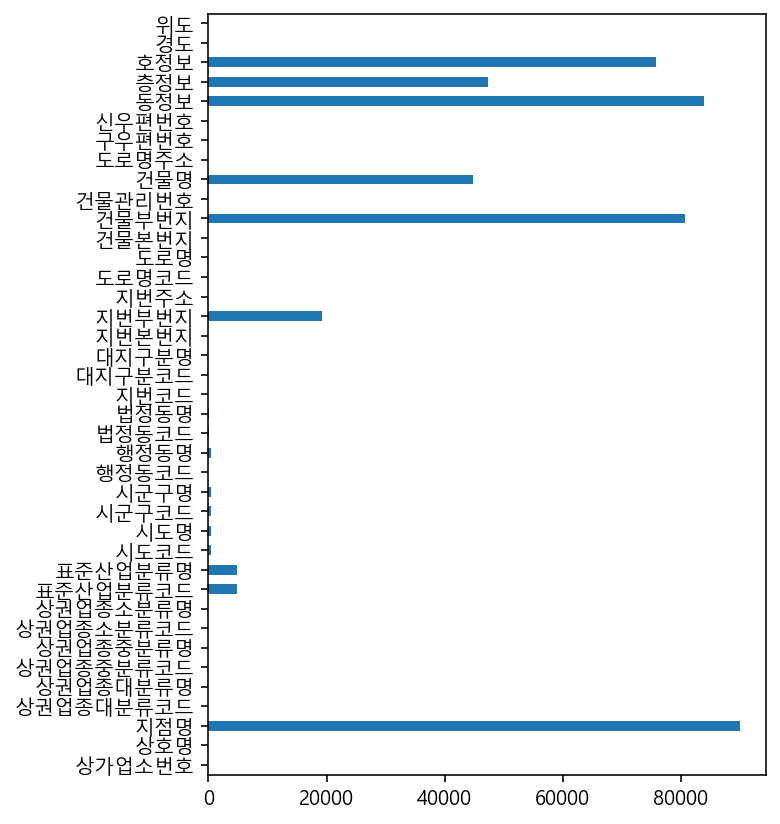

In [42]:
# .plot.bar를 통해 막대그래프로 표현 
# x,y축 돌리려면 rot 사용 ex) rot=40
# x,y축을 전환시키려면 barh사용
# figsize를 통해서 변수간 간격 조정 가능
null_count.plot.barh(figsize=(5,7))


In [43]:
#결측치 수를 reset_index를 통해 데이터 프레임 변환
#df_null_count 변수에 결과를 담아 head로 미리보기
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [44]:
# df_null_count 변수에 담겨있는 컬럼 이름을 "컬럼명", "결측치수"로 변경
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [51]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬
# 결측치가 많은 순으로 상위 10개 출력
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending = False).head(10)

## 특정 컬럼만 불러오기

In [50]:
# 지점명 컬럼 불러오기
# NaN == Not a Number 의 약자로 결측치 의미
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [53]:
# "컬럼명"이라는 컬럼값만 가져와서 drop_columns 변수에 담기
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [54]:
# drop_columns 변수로 해당 컬럼 정보만 데이터 프레임에서 가져오기
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [56]:
# axis = 0(행), 1(열)
# 제거 전후의 열 개수 비교
print(df.shape)
df = df.drop(drop_columns, axis = 1)
print(df.shape)

(91335, 39)
(91335, 29)


In [57]:
# 제거 결과를 info로 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [59]:
# 평균값
df["위도"].mean()

36.62471119236673

In [60]:
# 중앙값
df["위도"].median()

37.23465231770329

In [62]:
# 최댓값
df["위도"].max()

38.499658570559795

In [63]:
# 최솟값
df["위도"].min()

33.2192896688307

In [64]:
# 갯수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe
describe를 사용하면 데이터를 요약 가능. 기본적으로 수치형 데이터 요약을 출력
데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수, 중위수, 3사분위수, 최댓값 출력

In [65]:
# 위도를 describe로 요약
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [67]:
# 2개의 컬럼을 describe로 요약
# list형태의 자료구조 활용 [[]]
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [68]:
# describe로 문장열 데이터타입의 요약을 봅니다.
# 결측치는 제외하고 결과값을 나타내줌
df.describe(include="object")
# include를 all로 하면 수치(number)형 문자(object)형 모두 나타낸다.
# top은 가장 높은 빈도로 저장된 데이터, freq는 그 데이터의 빈도수 표시

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복 제거한 값 보기
* unique로 중복을 제거하고, nunique로 갯수 파악

In [69]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [70]:
df["상권업종대분류명"].nunique()
# 의료라는 데이터가 1번 나옴

1

In [71]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [73]:
df["상권업종중분류명"].nunique()

5

In [74]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [75]:
df["상권업종소분류명"].nunique()

34

In [77]:
# nuique 대신 len을 사용가능
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있다.

In [78]:
# value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있다.
# 시도명 세어보기
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [81]:
# 시도명 세어보기
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [82]:
# normalize = True 옵션을 사용하면 비율보기 가능
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

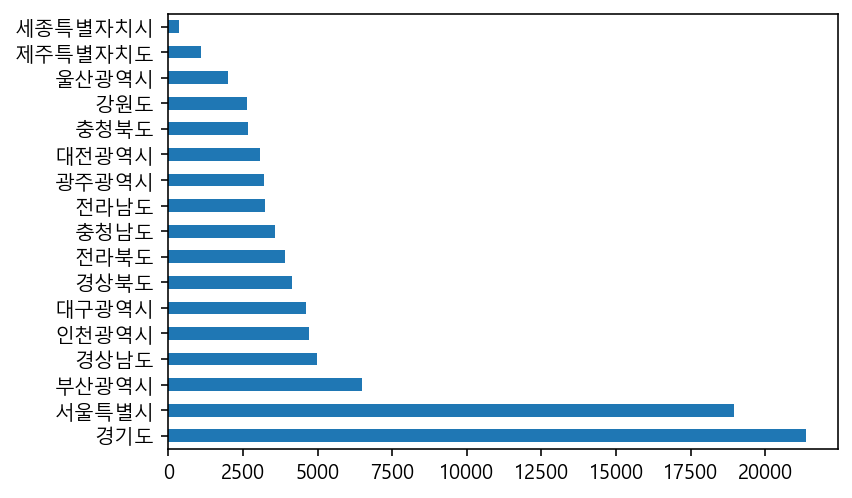

In [85]:
# Pandas 에는 plot기능을 내장
# 위에서 분석한 시도명 수를 막대그래프로 표현
city.plot.barh()

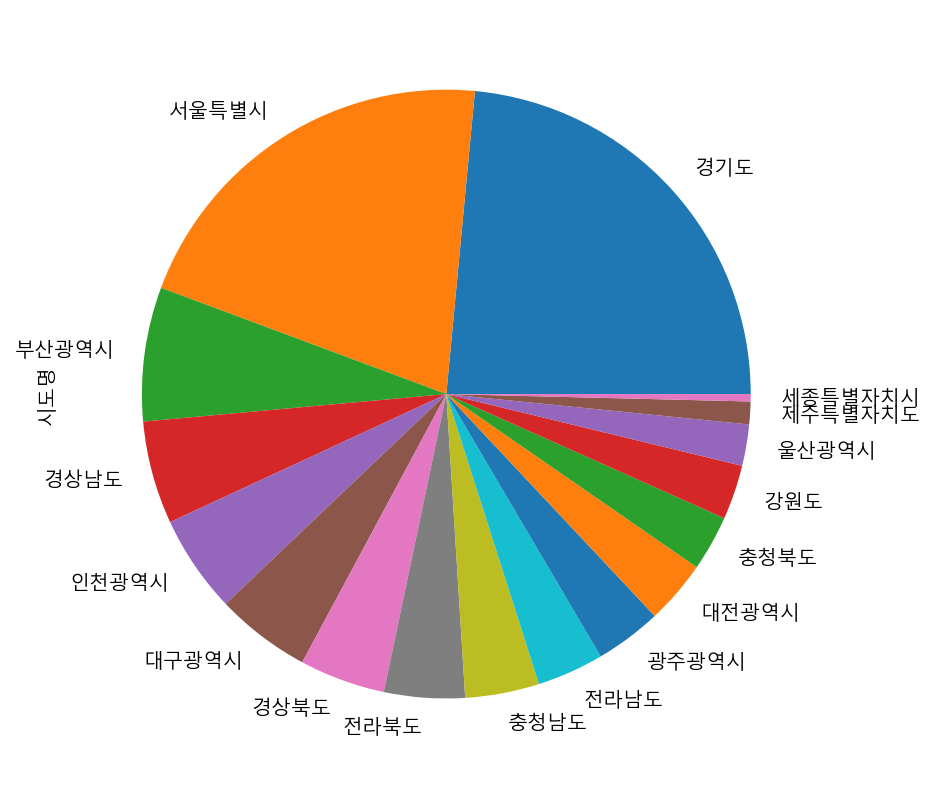

In [90]:
# 판다스의 plot.pie()를 사용해서 파이그래프 그리기
city_normalize.plot.pie(figsize=(7,7))
# 하지만 좋은 시각화는 아님, 차이나 크기 비교가 어렵기 때문

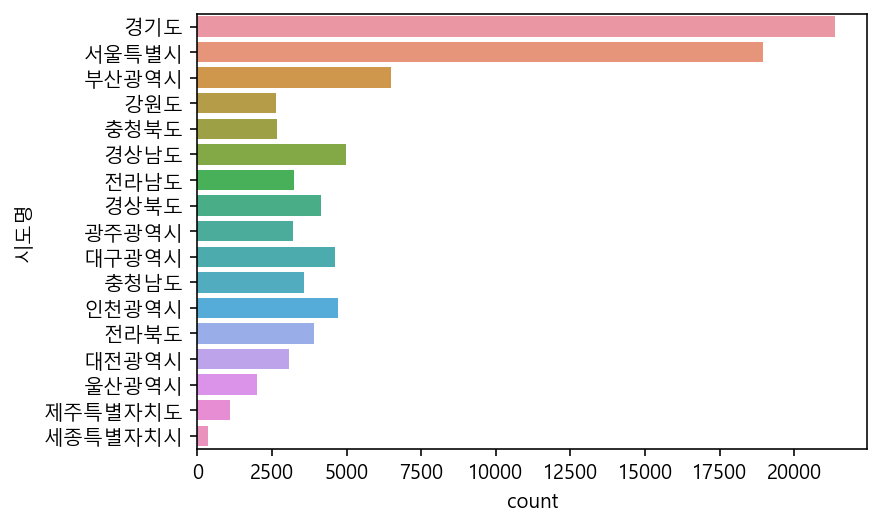

In [92]:
# seaborn의 countplot으로 그려보기
# seaborn의 장점은 고급통계기능을 제공
# 데이터가 커지면 속도가 느려지는게 단점
sns.countplot(data=df, y="시도명")

In [96]:
# "상권업종대분류명"으로 갯수새기
# 결측치는 제거하고 개수를 셈
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [97]:
# "상권업종중분류명" 갯수세기
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [99]:
# normalize=T 이용해 비율 구하기
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

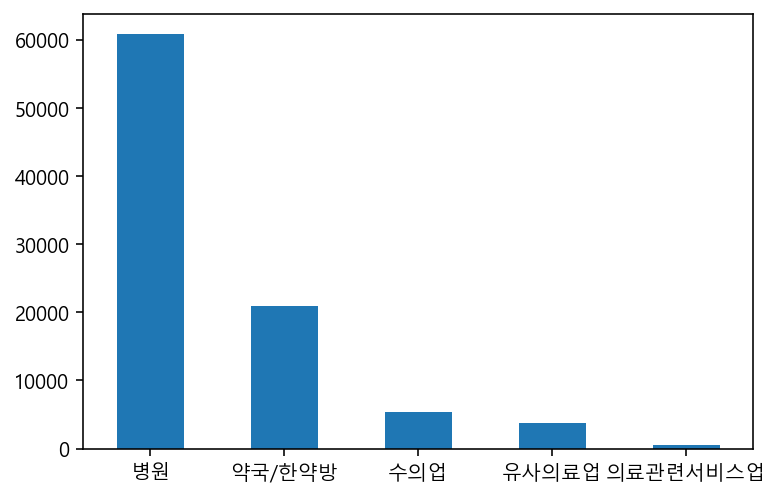

In [102]:
# 판다스의 plot.bar()를 사용해서 막대그래프 그리기
c.plot.bar(rot=0)

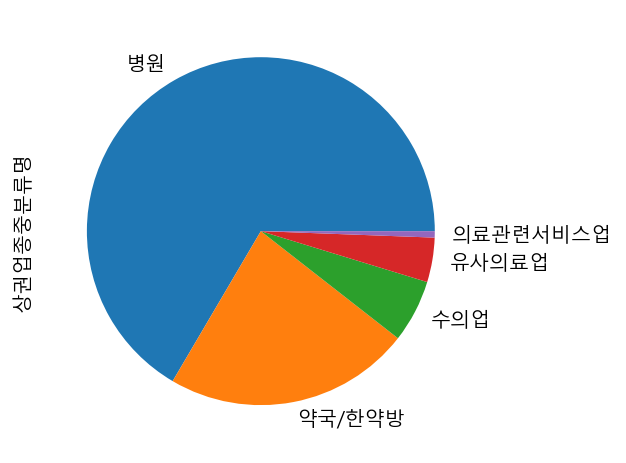

In [103]:
# 판다스의 plot.pie()를 사용해서 파이그래프 그리기
n.plot.pie()

In [105]:
# "상권업종소분류명"에 대한 그룹화된 값 카운트
b = df["상권업종소분류명"].value_counts()
b

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

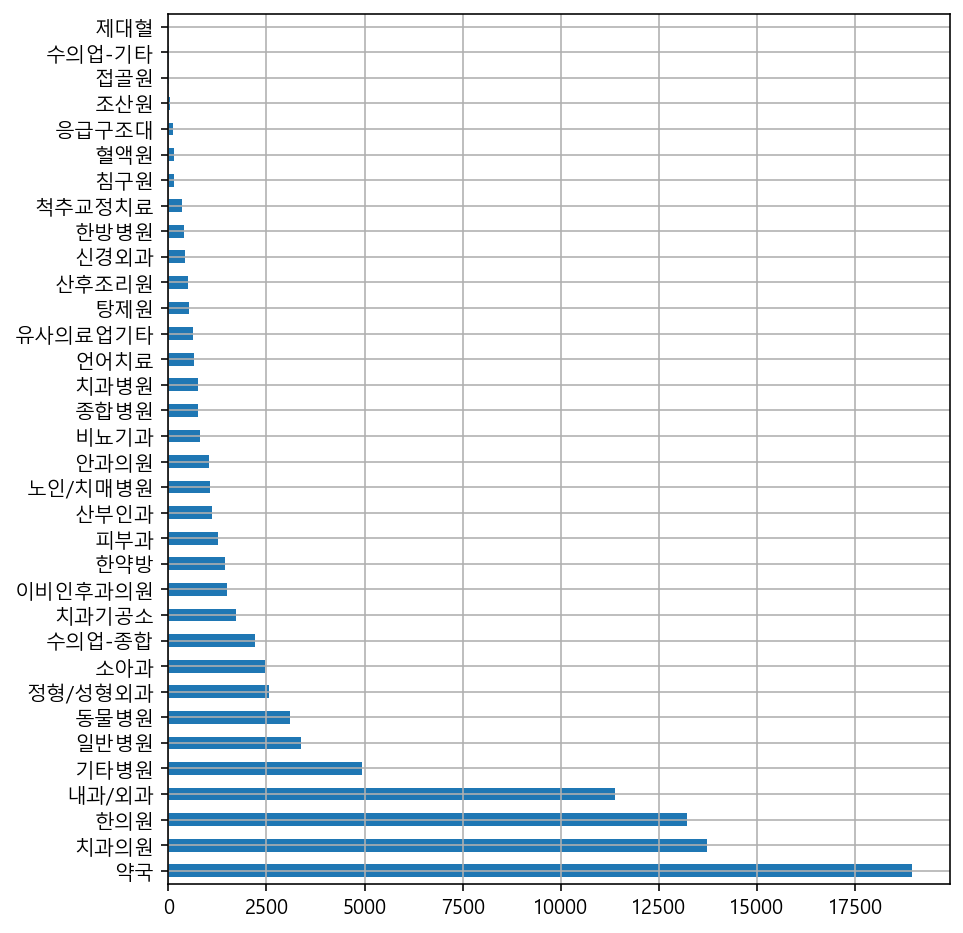

In [109]:
# "상권업종소분류명" 갯수세기
# 판다스의 plot.bar()를 이용해 막대그래프 그리기
# 그래프 크기 사이즈를 조절하여 label 간격 넓히기
# grid를 사용해 격자 그리기 가능
b.plot.barh(figsize=(7,8), grid=True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로보기

In [123]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 따로 가져와서
# df_medical 변수에 담기
# head()로 미리보기
# copy를 사용하여 원자료 훼손 방지
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [126]:
# "상권업종대분류명"에서 "의료"만 가져오기
# df.loc를 사용하여 행,렬 함께 가져오기
# 이 기능을 통해 "상권업종중분류명"만 가져오기
# 가져온 결과를 value_counts를 통해 중분류 갯수 세어보기
# 괄호는 최대한 줄여야 속도가 빠르다.
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [127]:
# 위와 같은 기능을 수행하는 코드, 다르게 표현
# boolean indexing 을 이용
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [133]:
# 유사의료업만 모아보기
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [132]:
# 상호명을 그룹화해 갯수세기
# value_counts를 사용해 상위 10개 출력
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [136]:
# 유사의료업만 df_medi 변수 저장
# df_medi 변수에서 상호명으로 갯수세기
# 가장 많은 상호 상위 10개 출력
df_medi["상호명"].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
어울림치과기공소     8
미소치과기공소      8
아트치과기공소      8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [143]:
# "상권업종소분류명"이 "약국"인 것과
# "시도명"이 "서울특별시"인 데이터 가져오기
# jupyternotebook은 맨 마지막 결과물만 출력함
# 여러줄을 출력하려면 print 사용
df["상권업종소분류명"] == "약국"
df["시도명"] == "서울특별시"
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 구별로 보기

In [145]:
# 위에서 색인한 데이터를 "시군구명"으로 그룹화해서 갯수세기
# 구별로 약국 갯수 확인
r = df_seoul_drug["시군구명"].value_counts()
r.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [147]:
# normalize=True 옵션을 통해 비율 구하기
m = df_seoul_drug["시군구명"].value_counts(normalize=True)
m.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

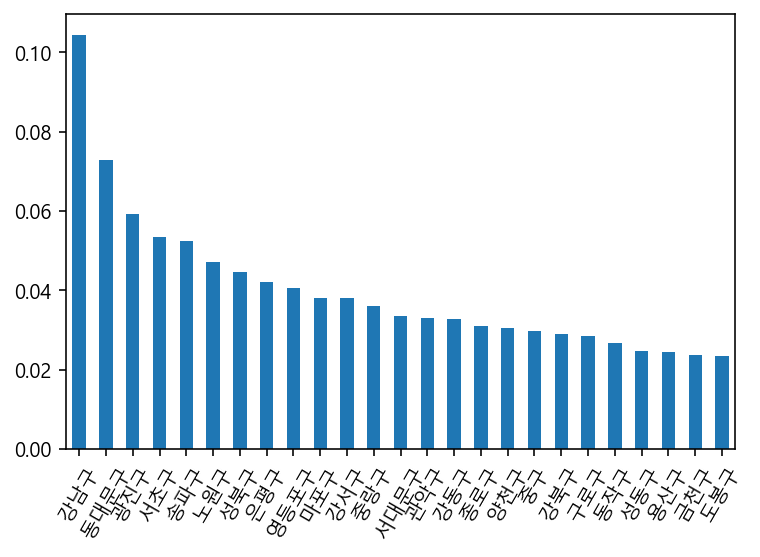

In [151]:
# 위 결과를 판다스 plot.bar()를 활용해 막대그래프 그리기
m.plot.bar(rot=60)

In [155]:
# "상권업종소분류명"이 "종합병원"인 것과
# "시도명"이 "서울특별시"인 데이터만 가져오기
# 결과를 df_seoul_hospital에 할당해 재사용
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & 
                       (df["시도명"] == "서울특별시")].copy()

In [156]:
# "시군구명"으로 그룹화 뒤 구별로 종합병원 수 세기
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
중구       5
강동구      5
송파구      5
양천구      4
강북구      4
도봉구      4
서대문구     4
성북구      3
중랑구      2
노원구      2
동대문구     2
성동구      2
종로구      2
관악구      2
구로구      2
강서구      2
금천구      2
동작구      1
은평구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

### 텍스트 데이터 색인하기

In [164]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터 찾기
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),
                     "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [165]:
# 상호명에서 특정 단어가 들어가 있는 데이터만 가져오기 - 곷배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [166]:
# 특정 단어가 있는 데이터 가져오기 - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [169]:
# 꽃배달 | 의료기 | 장례식장 | 상담소 | 어립이집 은 종합병원과 무관
# 전처리를 위한 해당 텍스트 한 번에 검색
# 제거할 데이터의 인덱스망 drop_row에 담고 list 형태로 변환
drop_row = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [174]:
# 의원으로 끝나는 데이터도 종합병원으로 보기 어렵다
# 인덱스를 찾아 drop_row2에 담고 list형태로 변환
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [175]:
# 삭제할 행을 drop_row에 합치기
drop_row = drop_row + drop_row2
len(drop_row)

33

In [176]:
# 해당 셀을 삭제 전과 후의 행 갯수 비교
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


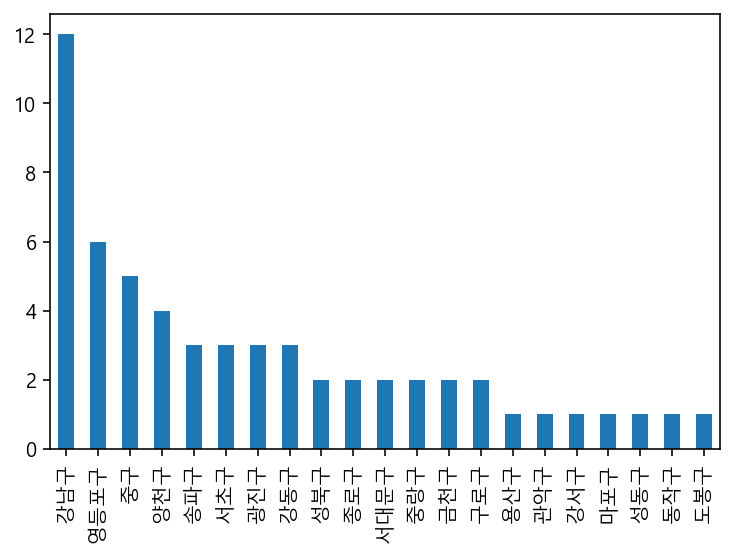

In [179]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그리기
df_seoul_hospital["시군구명"].value_counts().plot.bar()

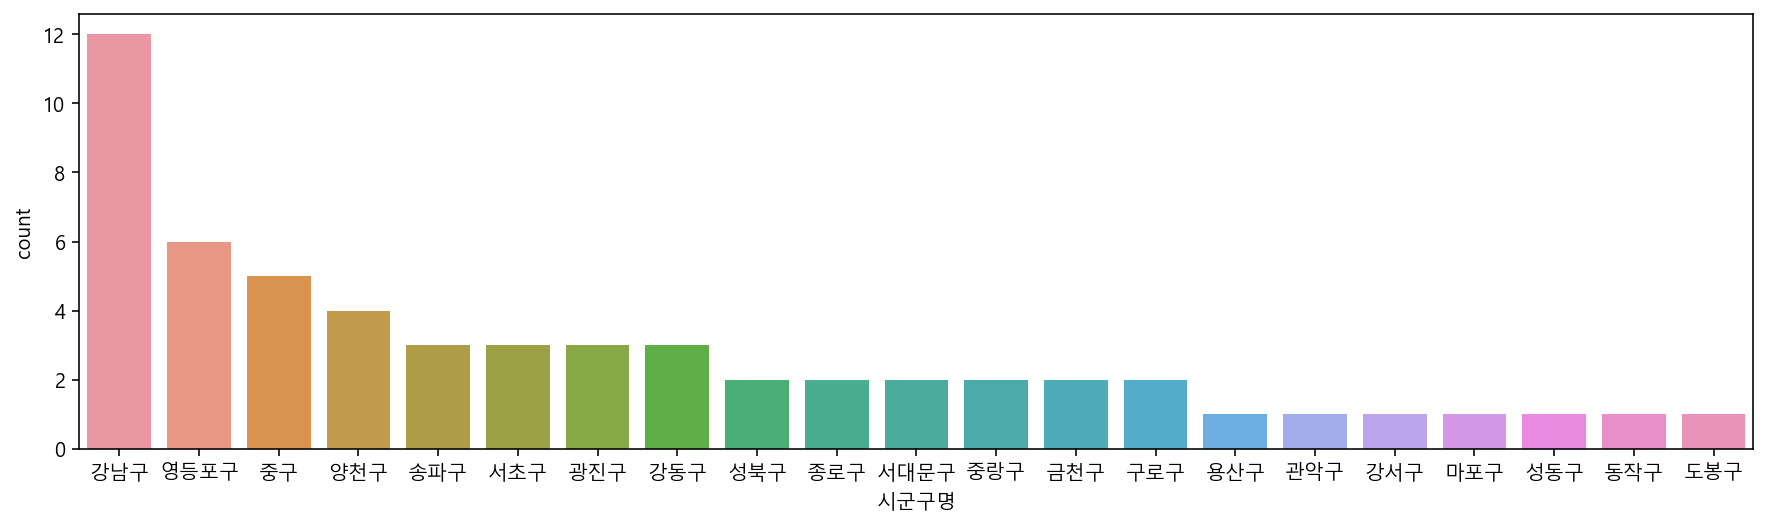

In [182]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명",
              order=df_seoul_hospital["시군구명"].value_counts().index)

In [183]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

### 특정 지역만 보기

In [185]:
# 서울에 있는 데이터의 위도와 경도 보기
# 결과를 df_seoul 데이터 프레임에 저장
# 새로운 변수에 데이터 프레임 저장시 copy() 사용
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

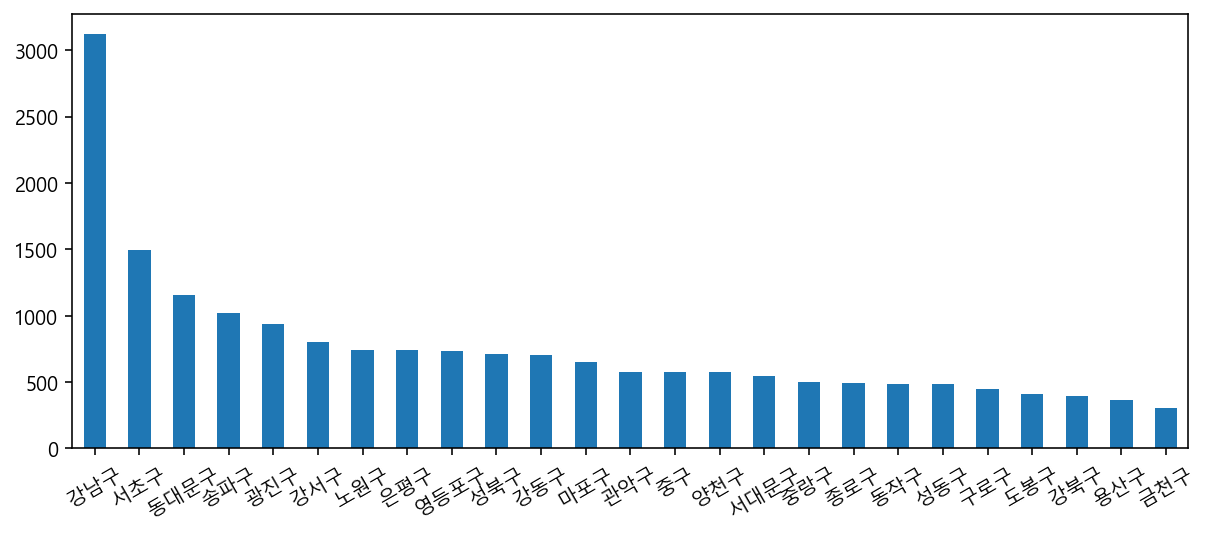

In [186]:
# seabor 의 countplot을 사용해 df_seoul 데이터프레임의
# 시군구명 시각화
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4),rot=30)

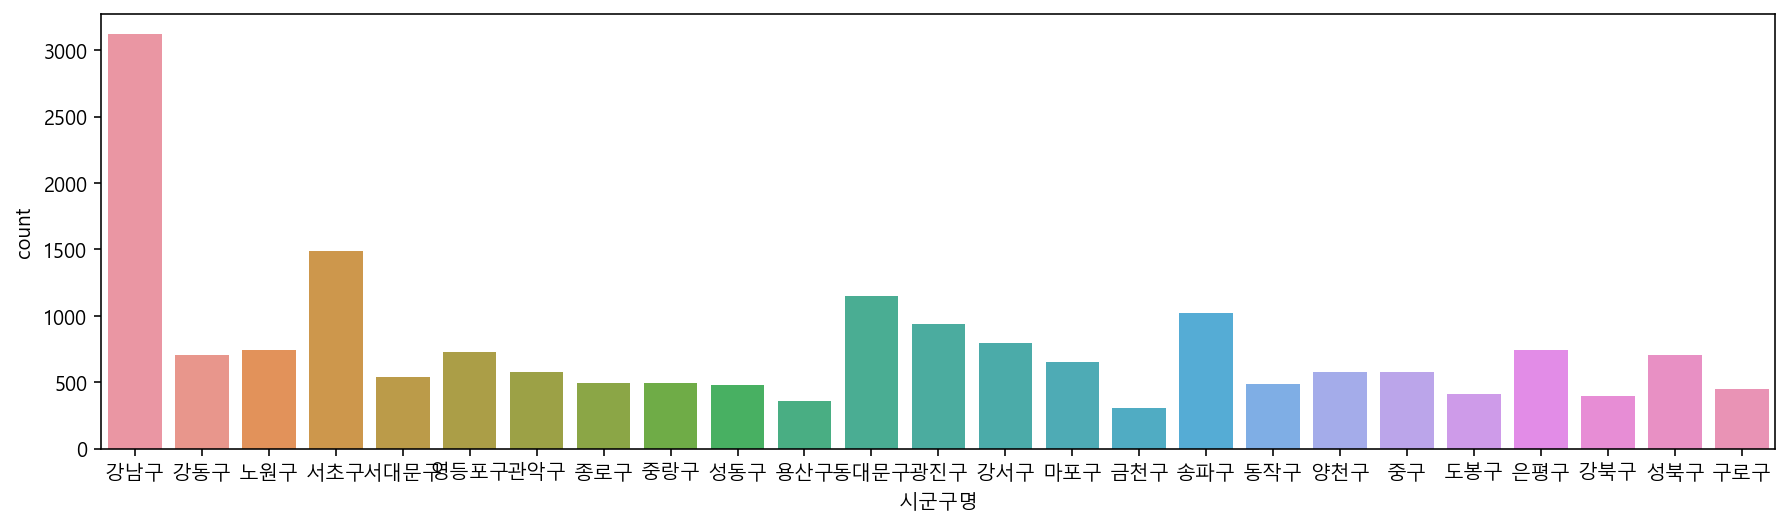

In [189]:
# 시군구명을 seaborn의 countplot 사용
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x="시군구명")

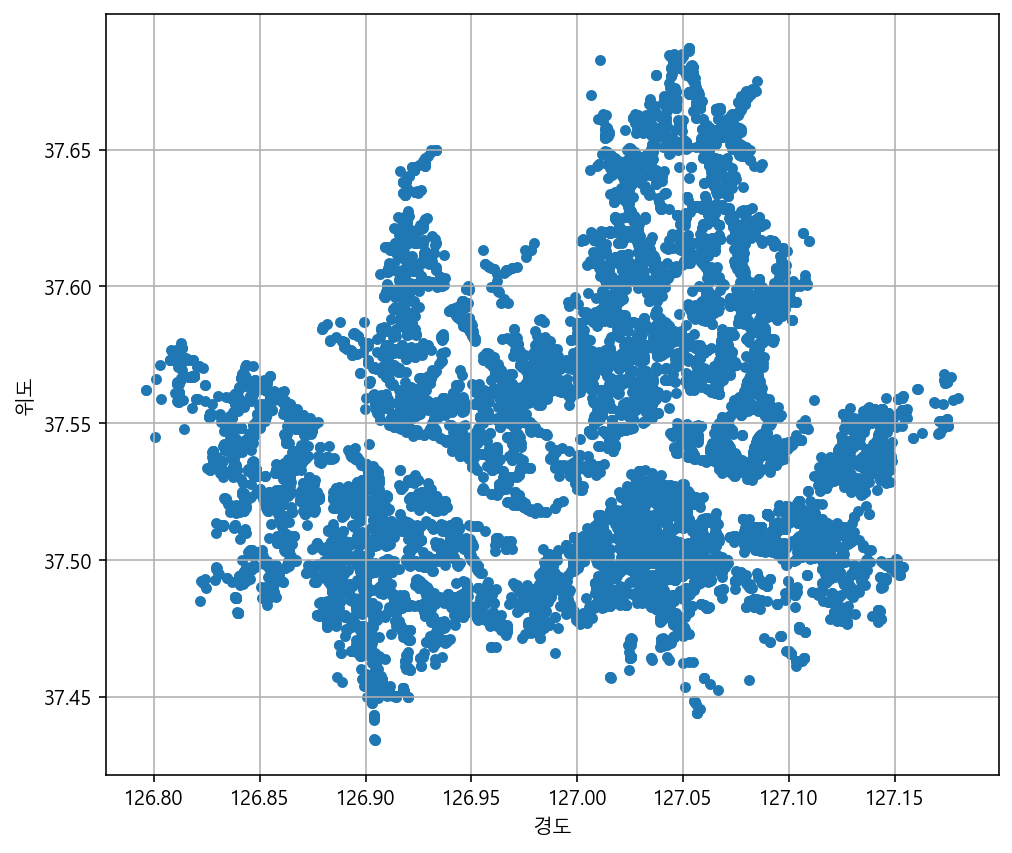

In [194]:
# Pandas 의 plot.scatter를 통해 경도와 위도를 표시
df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도",y="위도", figsize=(8,7),
                                         grid=True)

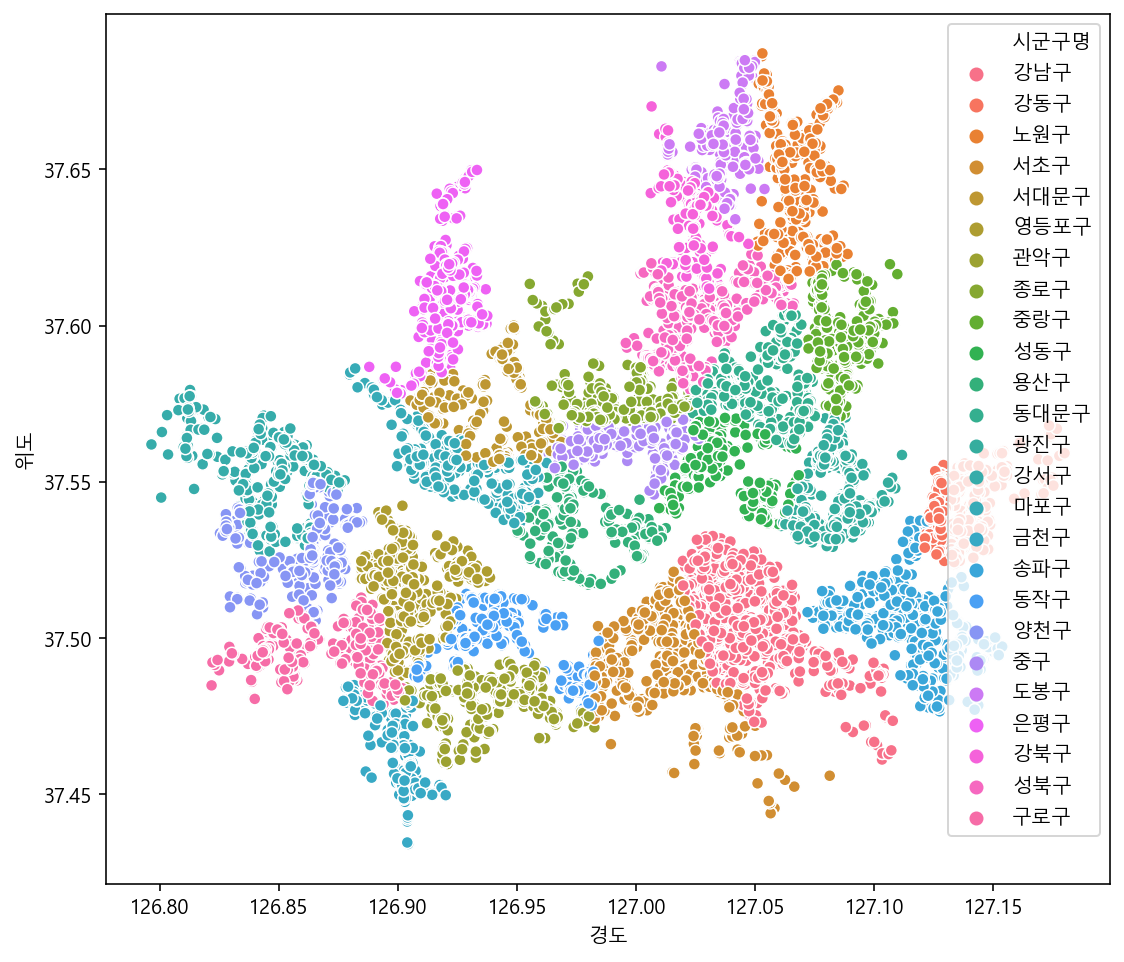

In [196]:
# seaborn의 scatterplot 을 통해 경도와 위도를 표시
# hue옵션은 색상을 의미
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

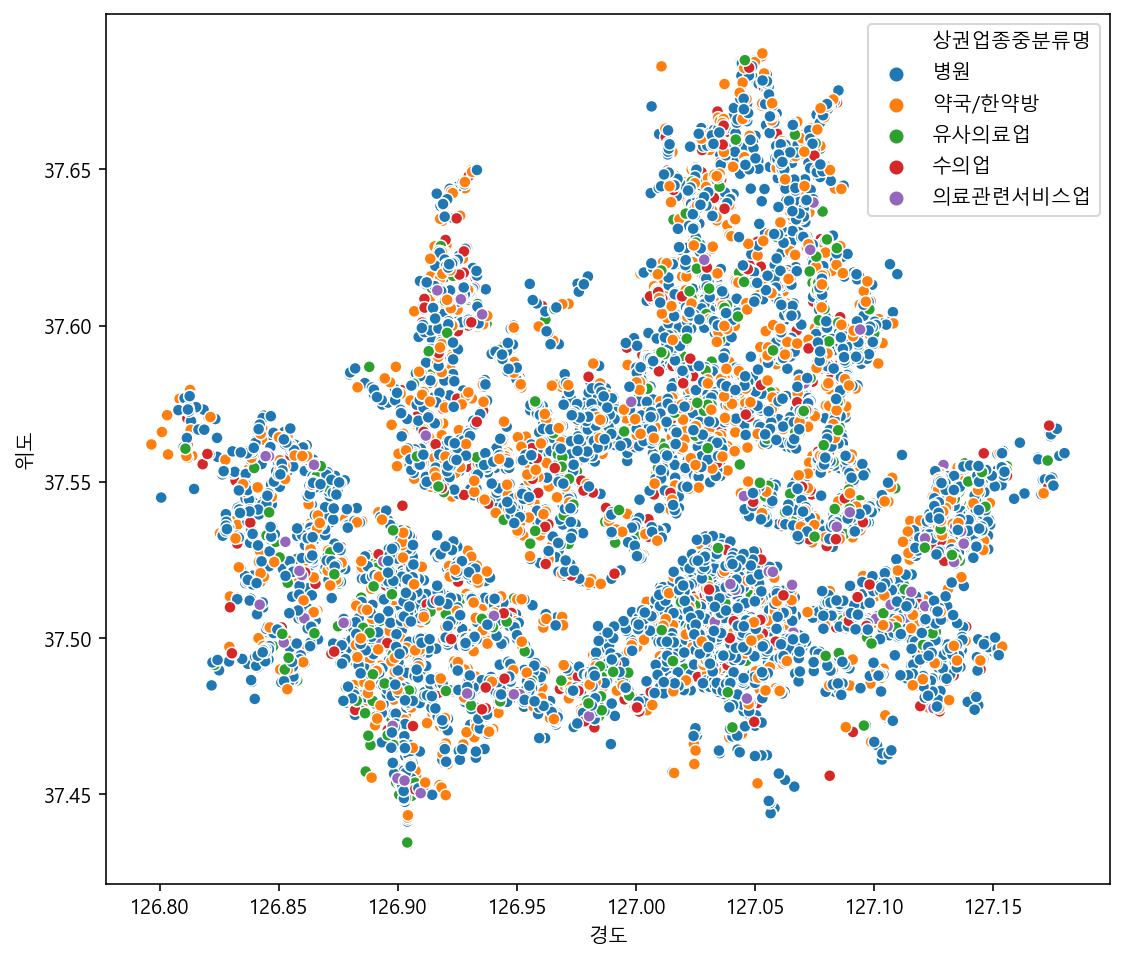

In [197]:
# seaborn의 scatterplot을 통해 "상권업종중분류명" 경도와 위도 표시
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

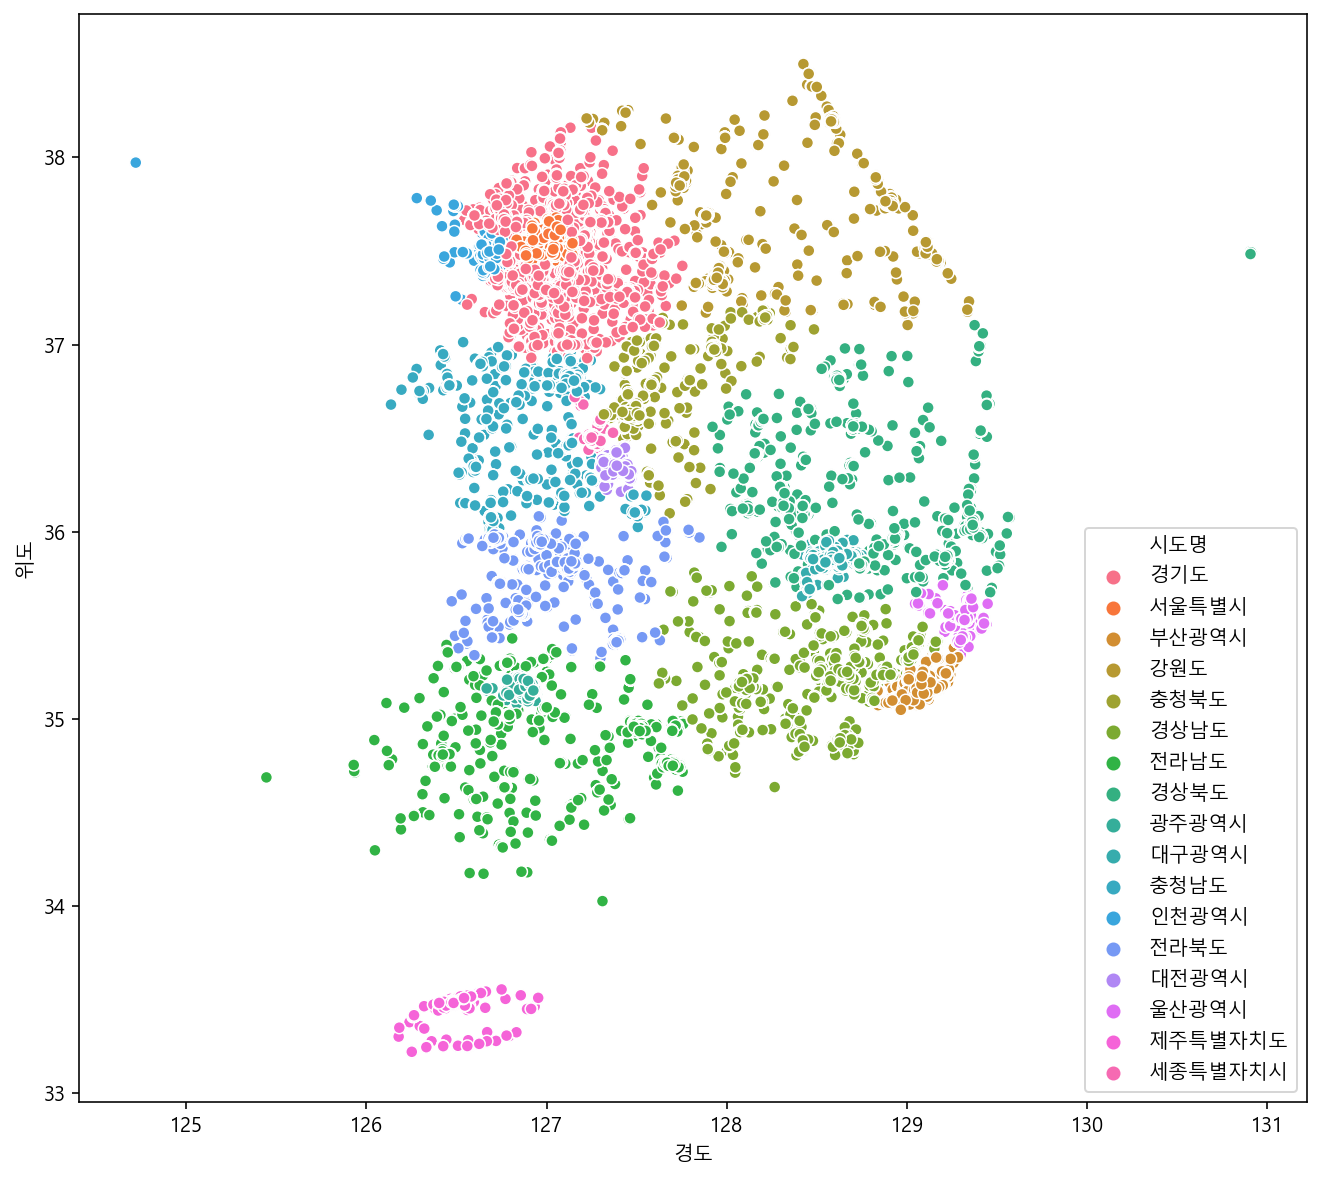

In [202]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도 위도 표시
plt.figure(figsize=(11,10))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## Folium으로 지도 활용하기
* conda 명령어로 설치
* conda install -c conda-forge folium


### Folium 사용예제
* https://python-visualization.github.io/folium/quickstart.html

In [209]:
# 지도 시각화를 위한 라이브러리
import folium

In [210]:
# 지도의 중심을 지정하기 위해 위도와 경도 평균 구하기
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [215]:
# 테스트용 하나 추출
df_seoul_hospital.tail(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
90788,16162338,성베드로병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 도곡동 910-27,116802000003,서울특별시 강남구 남부순환로,2649,1168011800109100027000895,서울특별시 강남구 남부순환로 2649,135859.0,6271.0,127.039567,37.485604


In [221]:
# map = folium.Map(location = [df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()],
#           zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n,"상호명"]
    address = df_seoul_hospital.loc[n,"도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n,"위도"], df_seoul_hospital.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map